<a href="https://colab.research.google.com/github/farmJun/2024-spark/blob/main/junyeong/weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Environment Variables:

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [1]:
!ls
!pwd

202304.xls  202306.xls	202308.xls  sample_data		     spark-3.5.1-bin-hadoop3.tgz
202305.xls  202307.xls	202309.xls  spark-3.5.1-bin-hadoop3
/content


In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

## Read Dataframes

In [38]:
from pyspark.sql.types import *

april_df = spark.read.csv('202304.csv', header=True, sep=",", inferSchema = True)
may_df = spark.read.csv('202305.csv', header=True, sep=",", inferSchema = True)
june_df = spark.read.csv('202306.csv', header=True, sep=",", inferSchema = True)
july_df = spark.read.csv('202307.csv', header=True, sep=",", inferSchema = True)
august_df = spark.read.csv('202308.csv', header=True, sep=",", inferSchema = True);
septemper_df = spark.read.csv('202309.csv', header=True, sep=",", inferSchema = True);


# **분석1: 대한민국 행정구역별 평균 온도 분석**

문제 설명
대한민국 행정구역별 평균 온도를 분석하시오.

regions = {

    "서울특별시": ["108"],
    "인천광역시": ["112"],
    "부산광역시": ["159"],
    "대구광역시": ["143"],
    "대전광역시": ["133"],
    "울산광역시": ["152"],
    "세종특별자치시": ["239"],
    "경기도": [
        119, 202, 203, 551, 549, 434, 433, 437, 438, 441, 444, 445,
        505, 504, 516, 532, 540, 541, 545, 546, 548, 550, 555, 556,
        565, 569, 571, 572, 590, 598, 601, 602, 603, 604
    ],
    "강원도": [
        104, 106, 114, 115, 121, 211, 212, 216, 217, 526, 555, 556,
        606, 90, 876, 93
    ],
    "충청북도": [127, 131, 221, 226, 601, 602, 603, 604],
    "충청남도": [
        129, 235, 236, 238, 232, 612, 615, 616, 618, 619, 627, 628,
        634, 636
    ],
    "전라북도": [140, 146, 702, 245, 247, 248, 254, 734, 737],
    "전라남도": [
        165, 168, 169, 170, 172, 712, 713, 730, 731, 732, 706, 709,
        710, 741, 754, 768, 789, 259, 260, 261, 262
    ],
    "경상북도": [
        135, 136, 137, 138, 271, 272, 273, 276, 277, 278, 279, 281,
        283, 284, 285, 288, 289, 294, 295, 801, 810, 812, 813, 815,
        822, 823, 825, 827
    ],
    "경상남도": [155, 162, 192, 253, 257, 264, 263, 268, 920],
    "제주특별자치도": ["184"]
}
다음은 지점 테이블의 지점 번호를 행정 구역별로 정리한 것입니다.(ex,충주(127))

1. 4월부터 9월까지의 데이터를 사용합니다.
2. 행정구역과 평균 온도의 평균을 기준으로 분석합니다.
3. 행정구역별 평균 온도의 평균이 높은 순서로 결과를 정렬합니다.

[결과 예시]

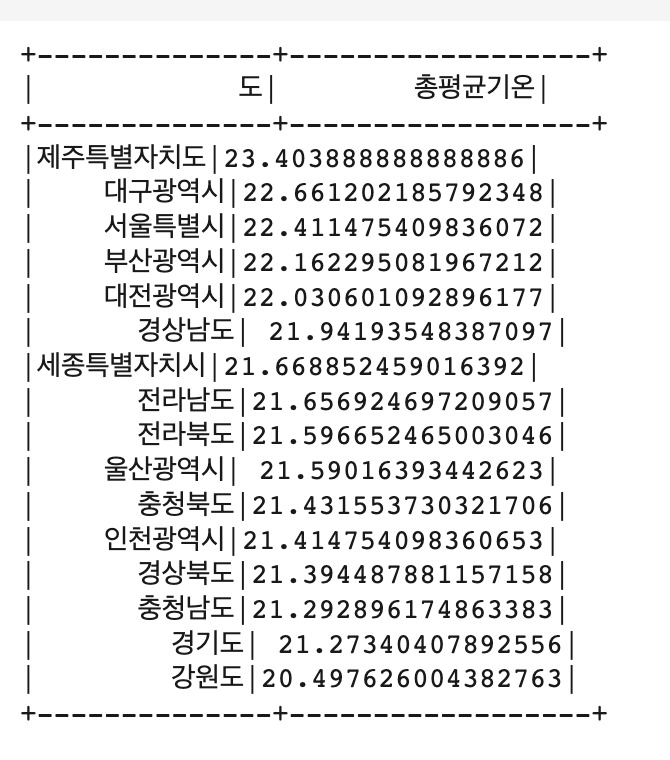